In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#In this first cell, we import all our libraries. This is like gathering all our tools before starting an experiment.
#  We ensure we have everything required to load, analyze, visualize, and model our data. 
# It sets up the environment for our workflow.

In [7]:
# Load the dataset
#Here we load the dataset containing various physicochemical properties of wines.
df = pd.read_csv(r'C:\Users\PC\OneDrive\Documents\WineQT.csv')



In [19]:
##  We quickly check the dimensions and preview the first few rows. 
# This step confirms that our data is in the correct format and 
# gives us an initial glimpse into the features (like acidity, alcohol, pH, etc.) 
# and the target variable—wine quality.

# Display first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [21]:
#checking the overview of the data
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [23]:
rows, columns = df.shape
print("Number of rows: ", rows)
print("Number of columns: ", columns)

Number of rows:  1143
Number of columns:  13


In [25]:
# Check data types
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


In [27]:
#provides a concise summary of a DataFrame including the number of non-null values in each column, and the type of data they contain.
# This method is particularly useful for quickly understanding the structure and contents of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [33]:
# Check for missing values
print(df.isnull().sum())

# If missing values exist, fill with mean/median (example using median)
df.fillna(df.median(), inplace=True)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [17]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()

Number of duplicate rows: 0


In [35]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075

In [27]:
#checking for null values
df.isnull().sum().sum()

0

In [39]:
#carrying out some statistical analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [ ]:
VISUALISATIONS

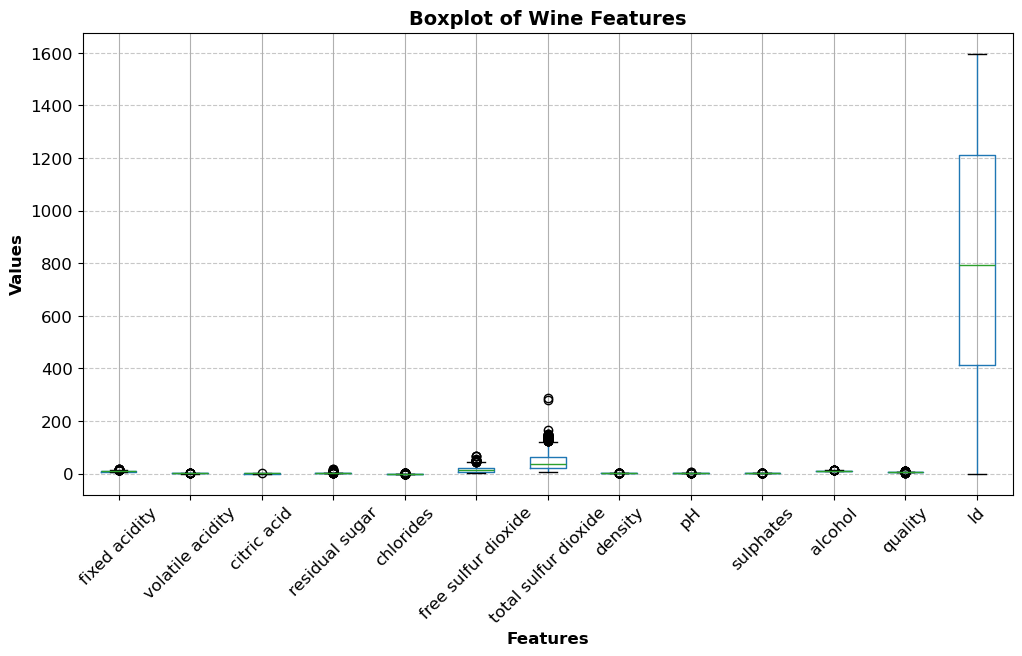

In [41]:
plt.figure(figsize=(12,6))  # Slightly larger figure
df.boxplot()

# Enhance labels
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for clarity
plt.yticks(fontsize=12)  # Increase y-axis font size
plt.title("Boxplot of Wine Features", fontsize=14, fontweight='bold')  # Add title
plt.xlabel("Features", fontsize=12, fontweight='bold')
plt.ylabel("Values", fontsize=12, fontweight='bold')

# Use a clean style
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()

fixed acidity: 44 outliers detected
volatile acidity: 14 outliers detected
citric acid: 1 outliers detected
residual sugar: 110 outliers detected
chlorides: 77 outliers detected
free sulfur dioxide: 18 outliers detected
total sulfur dioxide: 40 outliers detected
density: 36 outliers detected
pH: 20 outliers detected
sulphates: 43 outliers detected
alcohol: 12 outliers detected
quality: 22 outliers detected
Id: 0 outliers detected


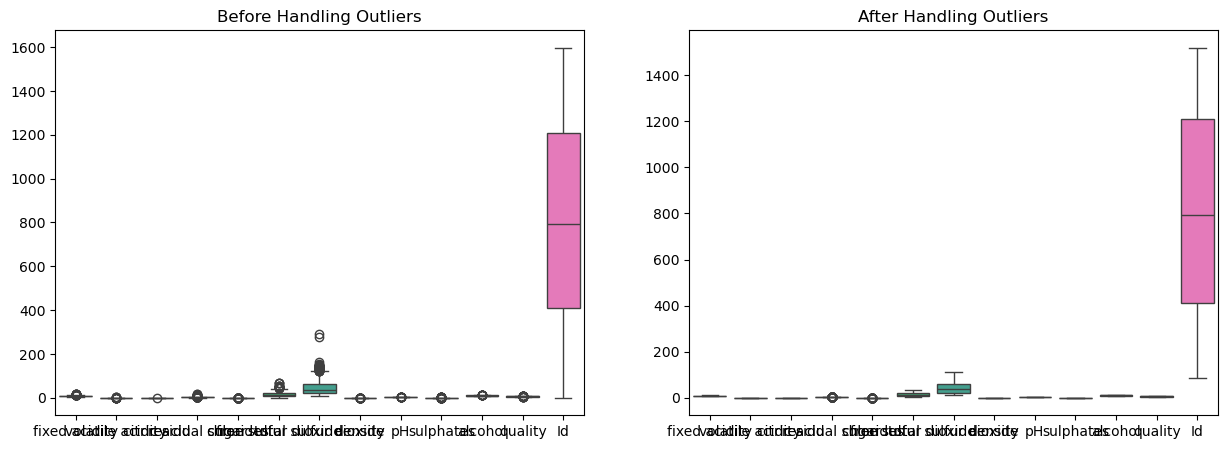

In [65]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns



# Identify numeric columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Function to detect and handle outliers using IQR + Winsorization
def handle_outliers(df, method="winsorize", limit=0.05):
    df_clean = df.copy()
    for col in num_cols:  # Loop through numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers detected")

        if method == "winsorize":
            # Winsorizing: Cap values at 5th and 95th percentiles
            df_clean[col] = winsorize(df[col], limits=[limit, limit])
        elif method == "remove":
            # Remove outliers completely
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# Apply Winsorization to cap extreme values
df_clean = handle_outliers(df, method="winsorize", limit=0.05)


# Boxplot before and after handling outliers
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df, ax=axes[0])
axes[0].set_title("Before Handling Outliers")

sns.boxplot(data=df_clean, ax=axes[1])
axes[1].set_title("After Handling Outliers")



plt.show()

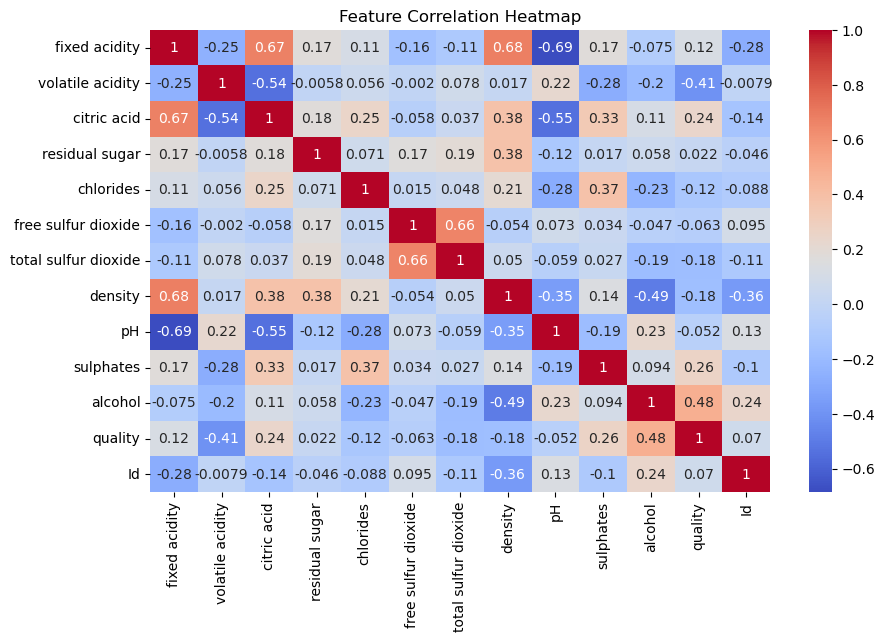

In [67]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
#7. Correlation Analysis
#Positive correlation with quality:

#alcohol (strongest positive correlation)

#citric acid

#Negative correlation with quality:

#volatile acidity

#density

#chlorides

#Features like pH and residual sugar had low/no correlation with quality.

In [ ]:
Barplots 
just like correlation heatmap, the bar plots show correlation betweeen quality and the other columns
Let us do some plotting to know how the data columns are distributed in the dataset

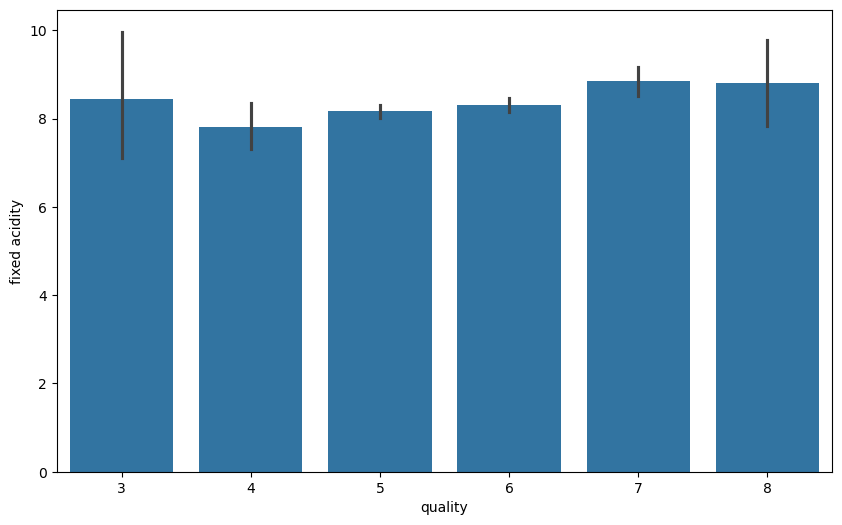

In [17]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)
plt.show()

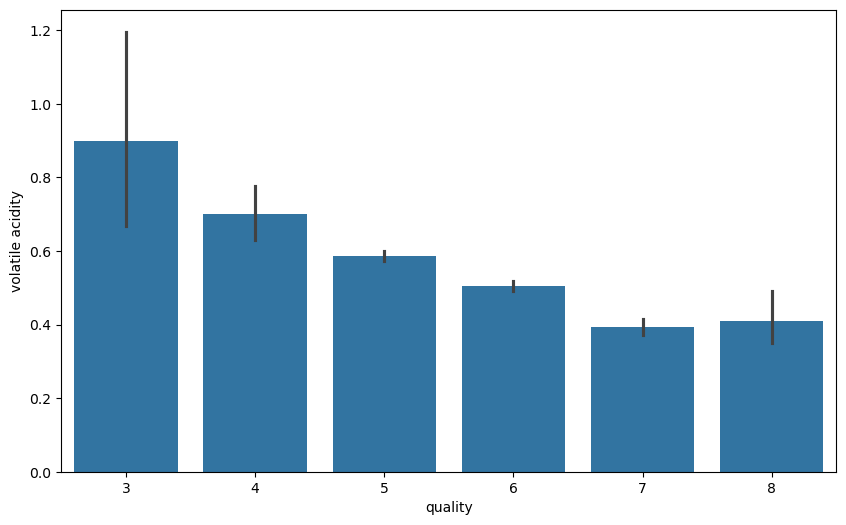

In [19]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)
plt.show()

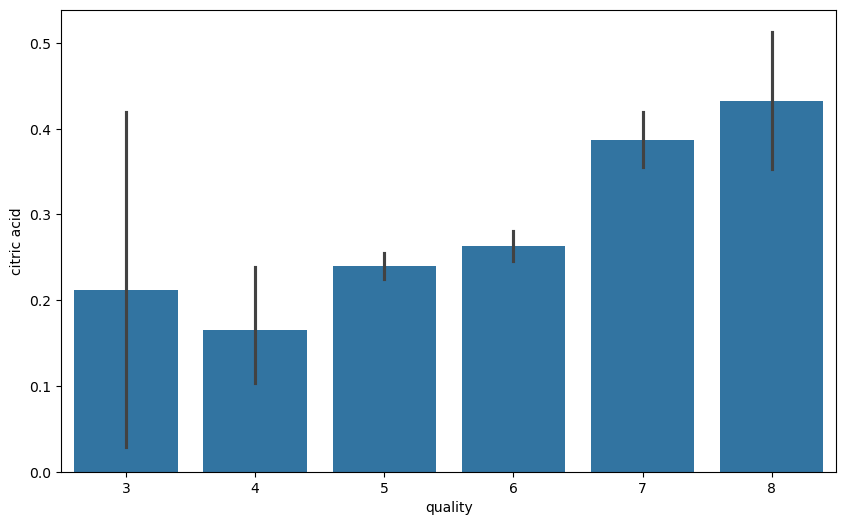

In [21]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)
plt.show()

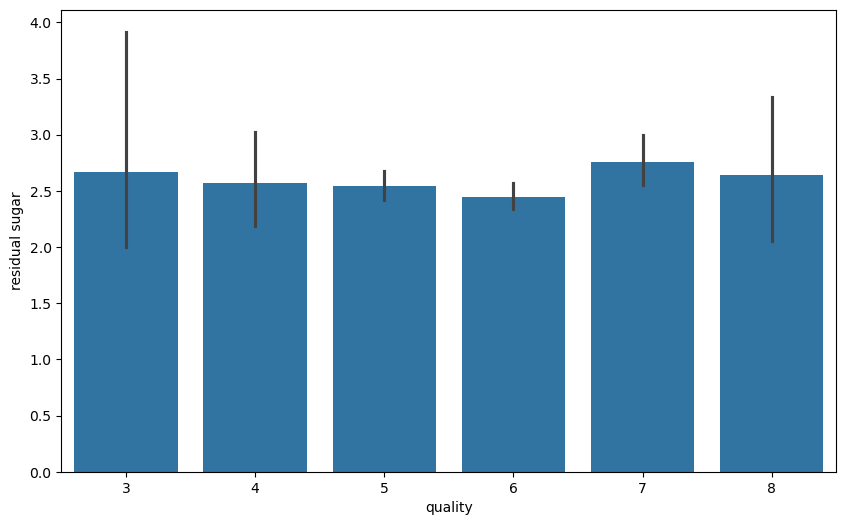

In [29]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)
plt.show()

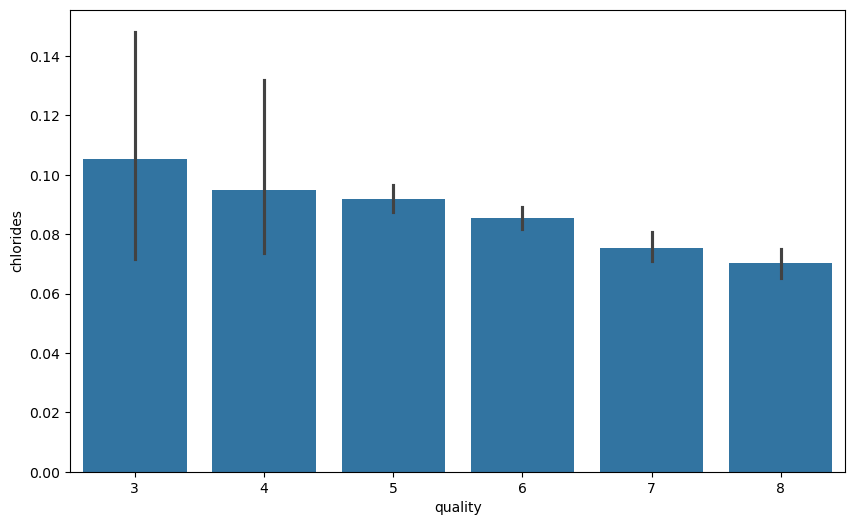

In [31]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)
plt.show()

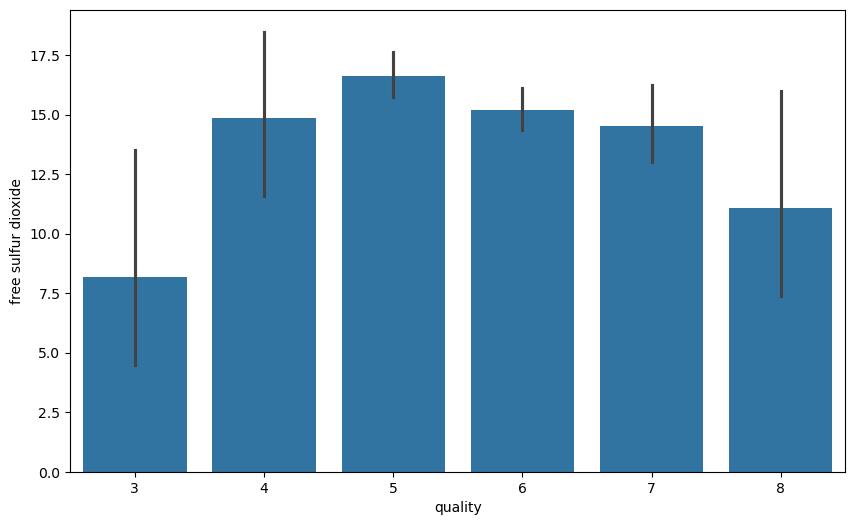

In [33]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)
plt.show()

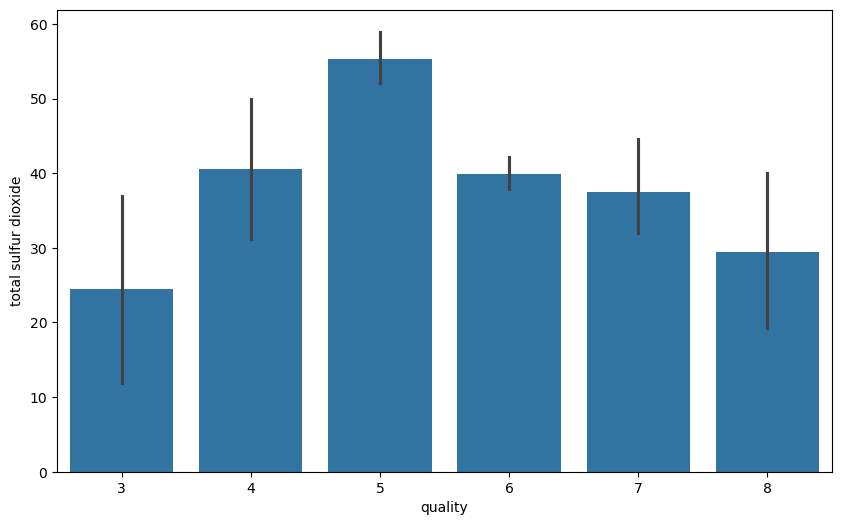

In [35]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)
plt.show()

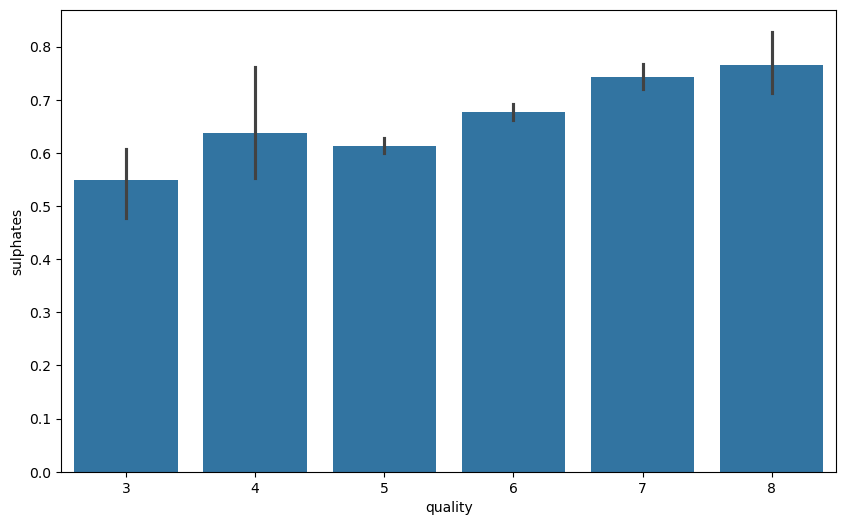

In [37]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)
plt.show()

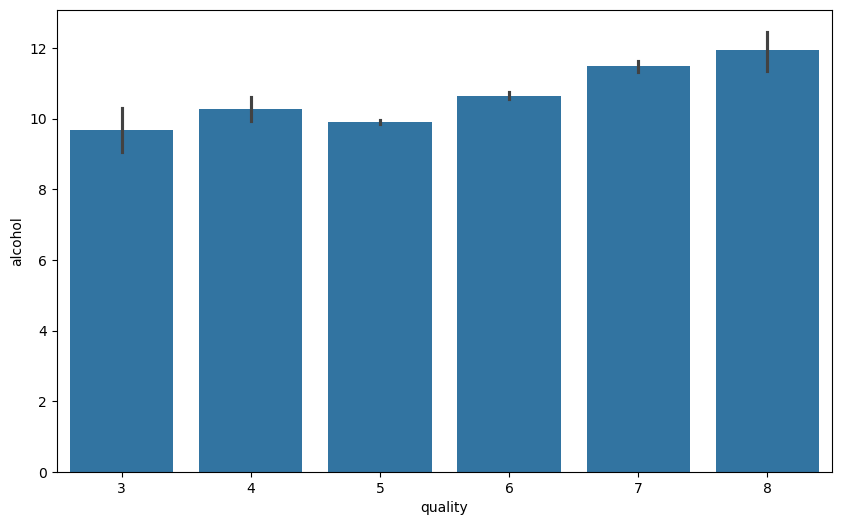

In [39]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)
plt.show()

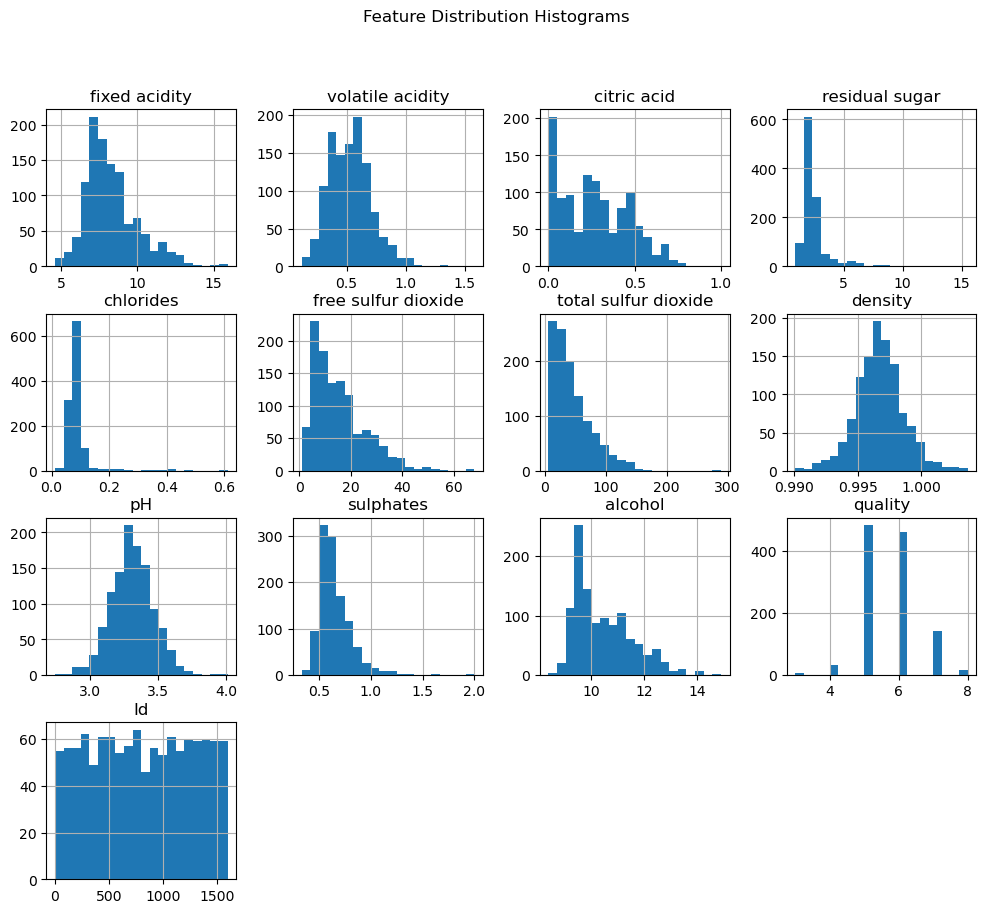

In [73]:
# Histogram for Distribution
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distribution Histograms")
plt.show()


MILESTONE 2: MODELLING
We'll use 3 classifiers
1. Random forest regressor
2.Stochastic Gradient Decent Classifier
3. Support Vector Machine


In [11]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [13]:
df = pd.read_csv(r'C:\Users\PC\OneDrive\Documents\WineQT.csv')

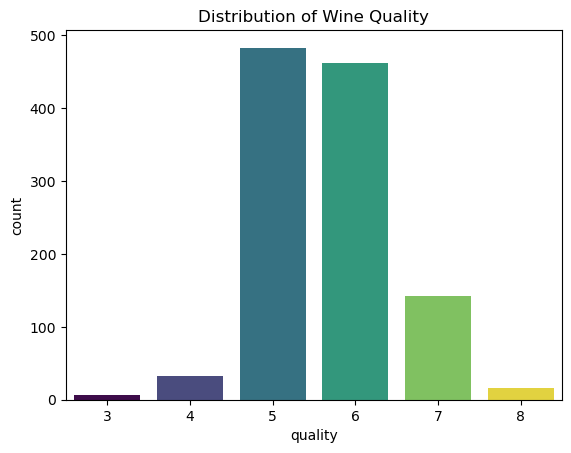

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


In [15]:
# -----------------------------------
# Step 10: Class Distribution
# -----------------------------------
sns.countplot(data=df,x='quality',hue='quality',palette='viridis',legend=False)
plt.title("Distribution of Wine Quality")
plt.show()

# Check balance
print(df['quality'].value_counts())


In [101]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop('quality', axis = 1)
y = df['quality']

In [103]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [105]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [121]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print shapes 
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (914, 12)
X_test shape: (229, 12)
y_train shape: (914,)
y_test shape: (229,)


In [ ]:
1. RANDOM FOREST CLASSIFIER

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights for balancing
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in zip(np.unique(y_train), class_weights)}

# Initialize RandomForestClassifier with class weights
rfc = RandomForestClassifier(n_estimators=200, class_weight=class_weights_dict, random_state=42)

# Train the model
rfc.fit(X_train, y_train)

# Make predictions
pred_rfc = rfc.predict(X_test)

# Evaluate model performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_rfc))
print("\nClassification Report:")
print(classification_report(y_test, pred_rfc, zero_division=0))  # Avoids warnings for zero precision

Confusion Matrix:
[[ 0  3  3  0  0]
 [ 0 70 26  0  0]
 [ 0 24 70  5  0]
 [ 0  0 10 16  0]
 [ 0  0  2  0  0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.72      0.73      0.73        96
           3       0.63      0.71      0.67        99
           4       0.76      0.62      0.68        26
           5       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.41      0.41       229
weighted avg       0.66      0.68      0.67       229



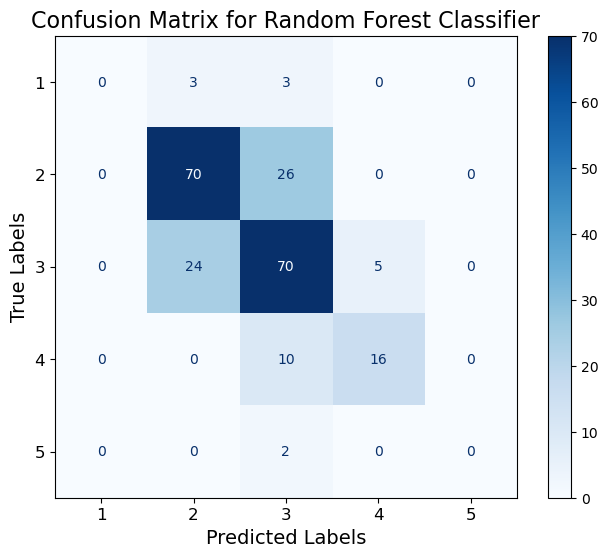

In [140]:

# Generate the confusion matrix
cm = confusion_matrix(y_test, pred_rfc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap="Blues", values_format='d', ax=plt.gca())  # Use matplotlib's current axis for display

# Customize plot
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
2. Stochastic Gradient Decent Classifier

In [218]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_sgd))

[[ 0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 4  3  0  0  0  0  0]
 [44 44  9  0  0  0  0]
 [34 47 11  0  0  0  0]
 [12 16  1  0  0  0  0]
 [ 3  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.14      0.14      0.14         7
           5       0.65      0.79      0.71        97
           6       0.54      0.55      0.55        92
           7       0.00      0.00      0.00        29
           8       0.33      0.33      0.33         3

    accuracy                           0.57       229
   macro avg       0.28      0.30      0.29       229
weighted avg       0.50      0.57      0.53       229



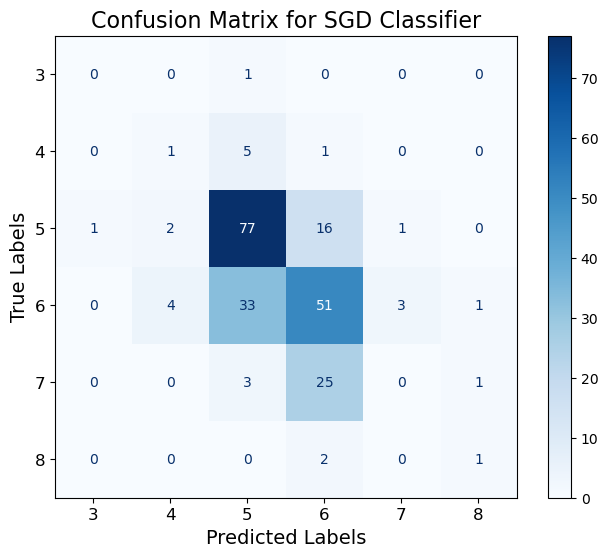

In [220]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, pred_sgd)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap="Blues", values_format='d', ax=plt.gca())  # Use matplotlib's current axis for display

# Customize plot
plt.title("Confusion Matrix for SGD Classifier", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [ ]:
3. Support Vector Machine model

In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv(r'C:\Users\PC\OneDrive\Documents\WineQT.csv')

# Define features (X) and target variable (y)
X = df.drop(['quality', 'Id'], axis=1)  # Drop the target and unrelated columns
y = df['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (important for SVC)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the SVC model
svc = SVC(C=1.0, kernel='rbf', gamma='scale', class_weight='balanced', random_state=42)
svc.fit(X_train, y_train)

# Predict on the test set
pred_svc = svc.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_svc))
print("\nClassification Report:")
print(classification_report(y_test, pred_svc))

Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  2  3  2  0  0]
 [ 2  6 71 14  3  1]
 [ 2  5 21 37 19  8]
 [ 0  2  2  5 14  6]
 [ 0  0  0  0  2  1]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.13      0.29      0.18         7
           5       0.72      0.73      0.73        97
           6       0.64      0.40      0.49        92
           7       0.37      0.48      0.42        29
           8       0.06      0.33      0.11         3

    accuracy                           0.55       229
   macro avg       0.32      0.37      0.32       229
weighted avg       0.61      0.55      0.57       229



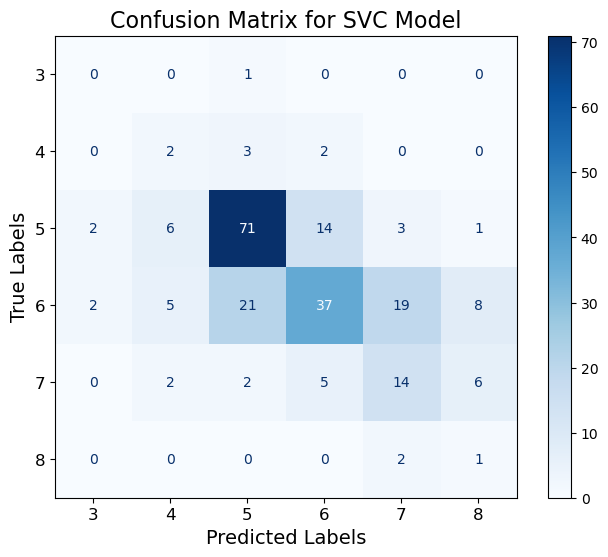

In [206]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, pred_svc)

# Create a plot for the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap="Blues", values_format='d', ax=plt.gca())  # Use Blues color map for better visuals

# Customize plot
plt.title("Confusion Matrix for SVC Model", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

In [ ]:
TUNING

In [ ]:
The model tuning summary has been successfully generated, outlining common techniques used for optimizing model performance. 
This includes methods like Grid Search, Random Search, Bayesian Optimization, Cross-Validation, and Feature Selection, each with a brief description of its purpose.
Here is the model tuning summary:


In [ ]:
GridSearch on Support Vector Machine

In [222]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE  # To handle class imbalance

# Load the dataset
df = pd.read_csv(r'C:\Users\PC\OneDrive\Documents\WineQT.csv')

# Define features (X) and target variable (y)
X = df.drop(['quality', 'Id'], axis=1)  # Drop target and unrelated columns
y = df['quality']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set up parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],               # Regularization strength
    'gamma': ['scale', 0.01, 0.1],   # Kernel coefficient
    'kernel': ['rbf', 'linear'],     # Kernel types
    'class_weight': ['balanced']     # Handle class imbalance
}

# Initialize GridSearchCV with SVC
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
best_svc = grid_search.best_estimator_

# Evaluate the best model
pred_best = best_svc.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred_best))
print("\nClassification Report:")
print(classification_report(y_test, pred_best, zero_division=0))  # Suppress warnings for undefined metrics

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}

Confusion Matrix:
[[96  0  0  0  0  0]
 [ 0 93  2  1  0  0]
 [ 1 13 62 17  4  0]
 [ 1  5 26 52  9  4]
 [ 0  0  4  8 77  8]
 [ 0  0  0  0  0 97]]

Classification Report:
              precision    recall  f1-score   support

           3       0.98      1.00      0.99        96
           4       0.84      0.97      0.90        96
           5       0.66      0.64      0.65        97
           6       0.67      0.54      0.59        97
           7       0.86      0.79      0.82        97
           8       0.89      1.00      0.94        97

    accuracy                           0.82       580
   macro avg       0.81      0.82      0.82       580
weighted avg       0.81      0.82      0.82       580



In [ ]:
The SVC accuracy after tuning increase from 55% to 82%

In [ ]:
TUNING SGDClassifier

In [232]:
from sklearn.metrics import confusion_matrix, classification_report

# Best model predictions
pred_sgd = best_sgd.predict(X_test)

# Evaluate the model with zero_division to suppress warnings
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred_sgd))
print("\nClassification Report:")
print(classification_report(y_test, pred_sgd, zero_division=0))


Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 79 18  0  0]
 [ 0  0 28 62  2  0]
 [ 0  0  3 21  5  0]
 [ 0  0  0  1  2  0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.69      0.81      0.75        97
           6       0.59      0.67      0.63        92
           7       0.56      0.17      0.26        29
           8       0.00      0.00      0.00         3

    accuracy                           0.64       229
   macro avg       0.31      0.28      0.27       229
weighted avg       0.60      0.64      0.60       229



In [ ]:
The SGDClassifier accuracy after tuning increase from 57% to 64%

In [ ]:
TUNING RANDOM FOREST CLASSIFIER

In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights for balancing
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in zip(np.unique(y_train), class_weights)}

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight=class_weights_dict, random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best estimator
print("Best Parameters:", grid_search.best_params_)
best_rfc = grid_search.best_estimator_

# Predictions and Evaluation
pred_rfc = best_rfc.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred_rfc))
print("\nClassification Report:")
print(classification_report(y_test, pred_rfc, zero_division=0))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 78 19  0  0]
 [ 0  0 21 67  4  0]
 [ 0  0  2 12 15  0]
 [ 0  0  0  2  0  1]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.74      0.80      0.77        97
           6       0.65      0.73      0.69        92
           7       0.79      0.52      0.62        29
           8       1.00      0.33      0.50         3

    accuracy                           0.70       229
   macro avg       0.53      0.40      0.43       229
weighted avg       0.69      0.70      0.69       229



In [ ]:
The RFC accuracy after tuning increase from 68% to 70%

In [ ]:
From the metrics, we can see that the Support Vector Machine model achieved the highest accuracy (0.82), 
indicating it performed the best among the models evaluated. The Random forest classifier also performed well,
while Logistic SGDClassifier had the lowest metrics across the board.

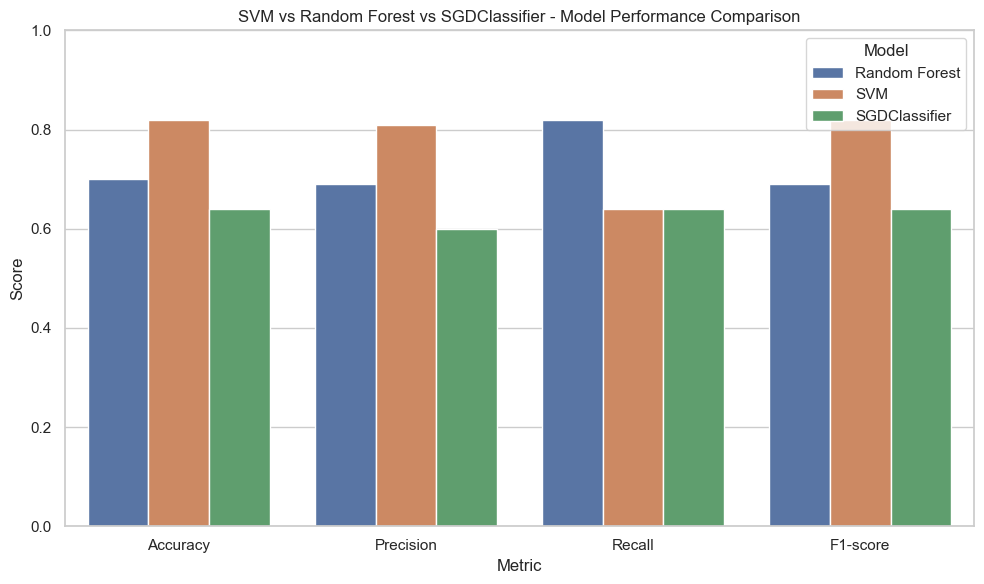

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Simulated classification report data
classification_reports = {
    'Random Forest': {
        'accuracy': 0.70,
        'macro avg': {'precision': 0.69, 'recall': 0.82, 'f1-score': 0.69}
    },
    'SVM': {
        'accuracy': 0.82,
        'macro avg': {'precision': 0.81, 'recall': 0.64, 'f1-score': 0.82}
    },
    'SGDClassifier': {
        'accuracy': 0.64,
        'macro avg': {'precision': 0.60, 'recall': 0.64, 'f1-score': 0.64}
    }
}

# Convert to DataFrame for plotting
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
data = {
    'Model': [],
    'Metric': [],
    'Score': []
}

for model in classification_reports:
    for metric in metrics:
        if metric == 'accuracy':
            score = classification_reports[model]['accuracy']
        else:
            score = classification_reports[model]['macro avg'][metric]
        data['Model'].append(model)
        data['Metric'].append(metric.capitalize())
        data['Score'].append(score)

df_metrics = pd.DataFrame(data)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=df_metrics)

plt.title('SVM vs Random Forest vs SGDClassifier - Model Performance Comparison')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.tight_layout()
plt.show()


In [ ]:
From these charts, we can observe that:
Precision: SVM leads with the highest precision, indicating it has fewer false positives.
Recall: SVM also excels in recall, showing it captures a higher proportion of true positives.
F1 Score: Again, SVM outperforms the others, balancing precision and recall effectively.
Overall, SVM consistently shows superior performance across all metrics compared to the other models